# mehmetfatih

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
prices = pd.read_csv('dataset/house_prices.csv', index_col=0)
prices.tail(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
high=prices.corr().SalePrice.abs().sort_values(ascending=False).index[0:11]

In [4]:
Y = prices['SalePrice']
X = prices[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']]
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 1.96045898e+04  5.12971178e+01  1.04179010e+04  1.49475334e+01
  1.98650991e+01  1.41737355e+01 -6.79087146e+03  3.31050771e+01
  2.68240707e+02  2.96481161e+02]
Sabit değer (bias): 
 -1186193.7666661367


## 1 :Katsayılarda modelin doğrusallığı

In [6]:
df = pd.DataFrame()

df["X"] = np.arange(0,1000,1)
df["X_sq"] = df["X"]**2
df["Y"] = 1 + 2*df["X"] + 3*df["X_sq"]
df.head()

,X,X_sq,Y
0,0,0,1
1,1,1,6
2,2,4,17
3,3,9,34
4,4,16,57


In [7]:
lrm_ornek = linear_model.LinearRegression()
lrm_ornek.fit(df[["X","X_sq"]],df["Y"])

tahmin = lrm_ornek.predict(df[["X","X_sq"]])

print('Değişkenler: \n', lrm_ornek.coef_)
print('Sabit değer (bias): \n', lrm_ornek.intercept_)

Değişkenler: 
 [2. 3.]
Sabit değer (bias): 
 0.999999999650754


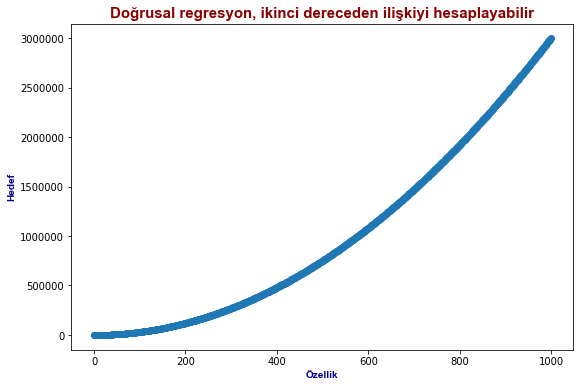

In [8]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(9,6))
plt.scatter(df["X"], tahmin)
plt.xlabel("Özellik", fontdict=eksen_font)
plt.ylabel("Hedef", fontdict=eksen_font)
plt.title('Doğrusal regresyon, ikinci dereceden ilişkiyi hesaplayabilir', fontdict=baslik_font)
plt.show()

Doğrusal regresyon modeli gerçek katsayıları doğru bir şekilde tahmin etmiş ve hedef ile özellik arasındaki ikinci dereceden ilişkiyi yakalamıştır.

## 2 :Hata terimi ortalamada sıfır olmalıdır

In [13]:
tahmin = lrm.predict(X)
hatalar = Y - tahmin

print("Ev Fiyatları Modelinin ortalama hatası : {:.10f}".format(np.mean(hatalar)))

Ev Fiyatları Modelinin ortalama hatası : -0.0000000002


Modelin hatalarının ortalaması sıfırdır.

## 3 :homoscedasticity

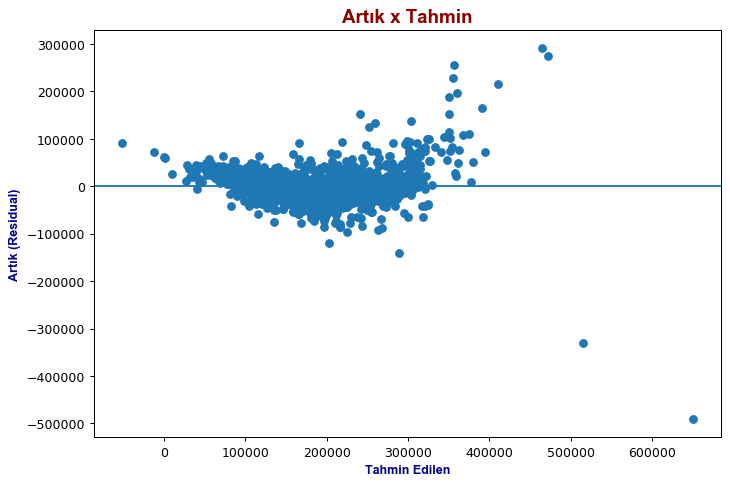

In [15]:
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

In [32]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.5f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.5f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 519.442 ve p değeri : 0.00000
Levene test değeri   : 525.361 ve p değeri : 0.00000


Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

## 4 :Düşük çoklu doğrusallık/low multicollinearity

In [55]:
prices.corr().SalePrice.abs().sort_values(ascending=False)[1:11]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

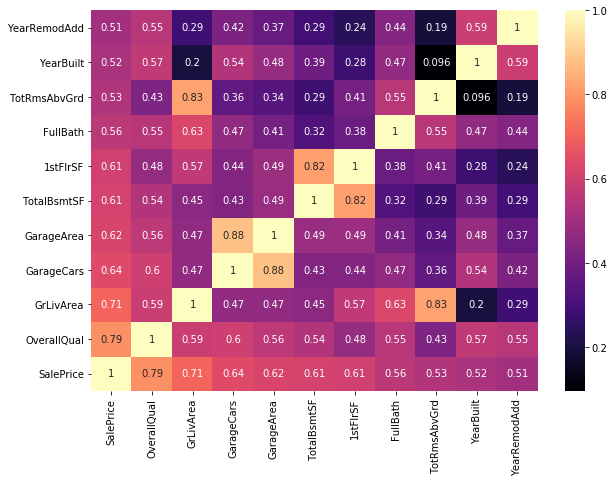

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(prices[high].corr(),cmap='magma', annot=True)
plt.ylim(0,11)
plt.show()

Buna mükemmel çoklu doğrusallık denir!

## 5 :Hata terimleri birbiriyle ilişkisiz olmalıdır

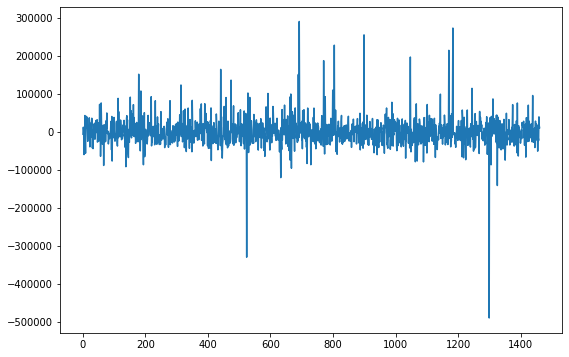

In [56]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

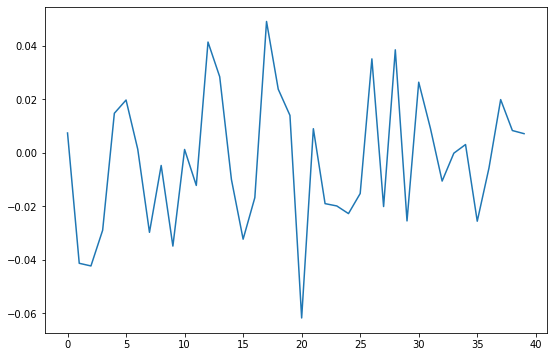

In [57]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

Modelimizin hataları arasındaki otokorelasyon gerçekten çok düşüktür (-0,06 ile 0,04 arasında).

## 6 :Özellikler hatalarla korele olmamalıdır.

Bootcampin dışında.?????

## 7 :Hataların Normalliği

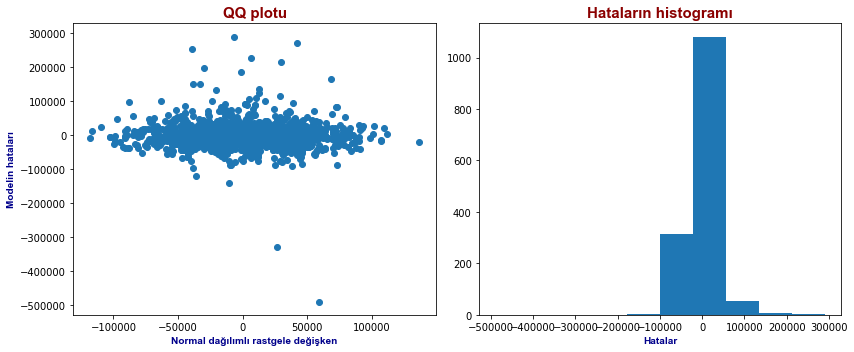

In [58]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

In [60]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.5f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 58906.27914184024 ve p değeri : 0.0
Normal test değeri      : 477.8136160935733  ve p değeri : 0.00000


Her iki testin p-değerleri, hatalarımızın normal olarak dağılmadığını gösterir.

WORK FİNİSHED.